# Treatment of qualitative variables and selection

In [1]:
import pandas as pd
pd.options.display.max_columns = None

In [2]:
cleaned_data = pd.read_pickle('./../input/cleaned_data.pkl')
cleaned_data.reset_index(inplace=True)
cleaned_data.drop(columns=['code', 'score'], inplace = True)
cleaned_data

,grade,group1,group2,energy,saturated_fat,sugars,sodium,salt,fibers,proteins
0,d,Fat and sauces,Dressings and sauces,936.0,2.2,22.0,1.840,4.60,0.0,5.1
1,b,Composite foods,One-dish meals,134.0,0.1,3.9,0.168,0.42,NaN,0.9
2,d,Sugary snacks,Biscuits and cakes,1594.0,15.5,21.9,0.040,0.10,4.4,4.6
3,a,Fruits and vegetables,Fruits,657.0,0.0,27.0,0.000,0.00,3.6,0.6
4,b,Composite foods,One-dish meals,598.0,1.0,1.0,0.108,0.27,NaN,1.9
...,...,...,...,...,...,...,...,...,...,...
742597,d,unknown,unknown,1448.0,17.0,18.0,0.076,0.19,NaN,6.0
742598,b,Cereals and potatoes,Cereals,1469.0,0.0,0.0,0.000,0.00,NaN,7.0
742599,d,unknown,unknown,1393.0,6.0,10.4,0.440,1.10,NaN,7.4
742600,d,Sugary snacks,Biscuits and cakes,925.0,4.8,24.0,0.112,0.28,NaN,2.6


In [3]:
cleaned_data.drop(columns=['group2'], inplace = True)
cleaned_data = cleaned_data.dropna()

cleaned_data

,grade,group1,energy,saturated_fat,sugars,sodium,salt,fibers,proteins
0,d,Fat and sauces,936.0,2.2,22.00,1.8400,4.6000,0.0,5.10
2,d,Sugary snacks,1594.0,15.5,21.90,0.0400,0.1000,4.4,4.60
3,a,Fruits and vegetables,657.0,0.0,27.00,0.0000,0.0000,3.6,0.60
8,a,Cereals and potatoes,669.0,0.5,0.60,0.1432,0.3580,1.6,9.50
16,c,Fruits and vegetables,1255.0,0.0,66.67,0.0000,0.0000,10.0,0.00
...,...,...,...,...,...,...,...,...,...
742570,b,Beverages,0.0,0.0,0.00,0.0100,0.0250,0.0,0.00
742571,b,Beverages,159.0,0.0,5.91,0.0630,0.1575,0.4,0.42
742573,a,Fruits and vegetables,0.0,5.0,0.50,0.0800,0.2000,25.0,32.00
742591,d,unknown,2076.0,1.9,1.50,0.3840,0.9600,0.0,6.90


## Processing of variables `pnns_groups_1` and `pnns_groups_2`

To prepare our data frame for training, we will have to convert our qualitative variables into numeric variables.


For that, we can use the `get_dummies()` method of pandas.

In [4]:
categories = pd.DataFrame(cleaned_data['group1'].unique())
categories.to_csv('./../docs/categories.csv', index=False)

cleaned_data = pd.get_dummies(cleaned_data, columns=['group1'], drop_first = True)
cleaned_data

,grade,energy,saturated_fat,sugars,sodium,salt,fibers,proteins,group1_Beverages,group1_Cereals and potatoes,group1_Composite foods,group1_Fat and sauces,group1_Fish Meat Eggs,group1_Fruits and vegetables,group1_Milk and dairy products,group1_Salty snacks,group1_Sugary snacks,group1_unknown
0,d,936.0,2.2,22.00,1.8400,4.6000,0.0,5.10,0,0,0,1,0,0,0,0,0,0
2,d,1594.0,15.5,21.90,0.0400,0.1000,4.4,4.60,0,0,0,0,0,0,0,0,1,0
3,a,657.0,0.0,27.00,0.0000,0.0000,3.6,0.60,0,0,0,0,0,1,0,0,0,0
8,a,669.0,0.5,0.60,0.1432,0.3580,1.6,9.50,0,1,0,0,0,0,0,0,0,0
16,c,1255.0,0.0,66.67,0.0000,0.0000,10.0,0.00,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742570,b,0.0,0.0,0.00,0.0100,0.0250,0.0,0.00,1,0,0,0,0,0,0,0,0,0
742571,b,159.0,0.0,5.91,0.0630,0.1575,0.4,0.42,1,0,0,0,0,0,0,0,0,0
742573,a,0.0,5.0,0.50,0.0800,0.2000,25.0,32.00,0,0,0,0,0,1,0,0,0,0
742591,d,2076.0,1.9,1.50,0.3840,0.9600,0.0,6.90,0,0,0,0,0,0,0,0,0,1


We therefore have a dataframe of more than 312,723 rows and 17 columns, the objective now will be to define which variables have the most impact to train a model.



> We will therefore seek to predict the nutrigrade (i.e. a class which can have as values ​​one of these: A, B, C, D, E)


### Removal of unhelpful columns

We can remove the variables `sodium` because the sodium level is directly related to the salt level.

In [5]:
cleaned_data.drop(columns=['sodium'], inplace = True)

cleaned_data

,grade,energy,saturated_fat,sugars,salt,fibers,proteins,group1_Beverages,group1_Cereals and potatoes,group1_Composite foods,group1_Fat and sauces,group1_Fish Meat Eggs,group1_Fruits and vegetables,group1_Milk and dairy products,group1_Salty snacks,group1_Sugary snacks,group1_unknown
0,d,936.0,2.2,22.00,4.6000,0.0,5.10,0,0,0,1,0,0,0,0,0,0
2,d,1594.0,15.5,21.90,0.1000,4.4,4.60,0,0,0,0,0,0,0,0,1,0
3,a,657.0,0.0,27.00,0.0000,3.6,0.60,0,0,0,0,0,1,0,0,0,0
8,a,669.0,0.5,0.60,0.3580,1.6,9.50,0,1,0,0,0,0,0,0,0,0
16,c,1255.0,0.0,66.67,0.0000,10.0,0.00,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742570,b,0.0,0.0,0.00,0.0250,0.0,0.00,1,0,0,0,0,0,0,0,0,0
742571,b,159.0,0.0,5.91,0.1575,0.4,0.42,1,0,0,0,0,0,0,0,0,0
742573,a,0.0,5.0,0.50,0.2000,25.0,32.00,0,0,0,0,0,1,0,0,0,0
742591,d,2076.0,1.9,1.50,0.9600,0.0,6.90,0,0,0,0,0,0,0,0,0,1


At this stage, we still have the nutrigrade and the nutriscore: it is obvious that if we are looking for the nutrigrade, in a user situation the person does not have the nutriscore either.

As we plan to train supervised machine learning model on this dataset, we must ensure we have at least a score for each individual :

In [6]:
dft = cleaned_data[cleaned_data['grade'].notna()]

We finally have the complete dataset, and with conversion of qualitative variables!

## Feature selection

We are not going to train our model on 17 columns, that would be too slow and probably underperforming. Instead, we'll use mathematical methods to try to keep as much information as possible while reducing the number of columns.

For that, we will use the function ``sklearn.feature_selection.SelectFromBest``.





## Feature selection with sklearn

## Data preparation

In [7]:
# Data preparation for clustering
data_for_training = dft.dropna()
y = dft['grade']
df_pca = dft.drop(columns=['grade']).copy()
X = df_pca.values
cols = df_pca.columns

X

array([[9.360e+02, 2.200e+00, 2.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.594e+03, 1.550e+01, 2.190e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.570e+02, 0.000e+00, 2.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 5.000e+00, 5.000e-01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.076e+03, 1.900e+00, 1.500e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [5.020e+02, 3.000e-01, 5.000e-01, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

### SelectKBest

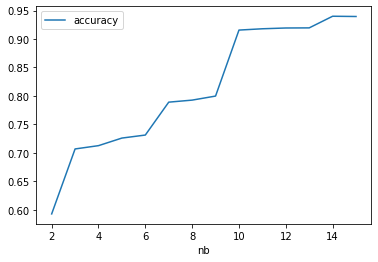

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Init, fit
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

accuracies = []
pipelines = []
for nb_features in range(2, 16):
    steps=[('selection',SelectKBest(k=nb_features)),('model', RandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    accuracies.append({'nb': nb_features, 'accuracy': accuracy_score(y_test, y_pred)})
    pipelines.append({'nb' : nb_features, 'pipeline' : pipeline})
    
accuracies = pd.DataFrame(accuracies)

accuracies.plot.line(x='nb', y='accuracy');

It looks like the best number of features is 13 at this moment.

In [14]:
best_pipeline = pipelines[11]['pipeline']
mask = best_pipeline['selection'].get_support()
best_features = pd.DataFrame(cols[mask], columns=['feature'])

best_features.to_csv('./../docs/best_features.csv', index=False)

best_features

,feature
0,energy
1,saturated_fat
2,sugars
3,salt
4,fibers
5,group1_Beverages
6,group1_Cereals and potatoes
7,group1_Composite foods
8,group1_Fat and sauces
9,group1_Fruits and vegetables


The current model is able to predict nutrigrade with a performance greater than 90%.

In [10]:
# First improvements

df_from_select_kbest = df_pca[best_features['feature']]

df_from_select_kbest

,energy,saturated_fat,sugars,salt,fibers,group1_Beverages,group1_Cereals and potatoes,group1_Composite foods,group1_Fat and sauces,group1_Fruits and vegetables,group1_Milk and dairy products,group1_Sugary snacks,group1_unknown
0,936.0,2.2,22.00,4.6000,0.0,0,0,0,1,0,0,0,0
2,1594.0,15.5,21.90,0.1000,4.4,0,0,0,0,0,0,1,0
3,657.0,0.0,27.00,0.0000,3.6,0,0,0,0,1,0,0,0
8,669.0,0.5,0.60,0.3580,1.6,0,1,0,0,0,0,0,0
16,1255.0,0.0,66.67,0.0000,10.0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742570,0.0,0.0,0.00,0.0250,0.0,1,0,0,0,0,0,0,0
742571,159.0,0.0,5.91,0.1575,0.4,1,0,0,0,0,0,0,0
742573,0.0,5.0,0.50,0.2000,25.0,0,0,0,0,1,0,0,0
742591,2076.0,1.9,1.50,0.9600,0.0,0,0,0,0,0,0,0,1


In [11]:
df_from_select_kbest['grade'] = y

df_from_select_kbest

,energy,saturated_fat,sugars,salt,fibers,group1_Beverages,group1_Cereals and potatoes,group1_Composite foods,group1_Fat and sauces,group1_Fruits and vegetables,group1_Milk and dairy products,group1_Sugary snacks,group1_unknown,grade
0,936.0,2.2,22.00,4.6000,0.0,0,0,0,1,0,0,0,0,d
2,1594.0,15.5,21.90,0.1000,4.4,0,0,0,0,0,0,1,0,d
3,657.0,0.0,27.00,0.0000,3.6,0,0,0,0,1,0,0,0,a
8,669.0,0.5,0.60,0.3580,1.6,0,1,0,0,0,0,0,0,a
16,1255.0,0.0,66.67,0.0000,10.0,0,0,0,0,1,0,0,0,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742570,0.0,0.0,0.00,0.0250,0.0,1,0,0,0,0,0,0,0,b
742571,159.0,0.0,5.91,0.1575,0.4,1,0,0,0,0,0,0,0,b
742573,0.0,5.0,0.50,0.2000,25.0,0,0,0,0,1,0,0,0,a
742591,2076.0,1.9,1.50,0.9600,0.0,0,0,0,0,0,0,0,1,d


In [12]:
df_from_select_kbest.to_pickle('./../input/training.pkl')

## Conclusions

At this point, we have proved that the current dataset is ready to be trained and may have a good performance on real data.

We need now to train multiple models and select the best.
Then we need to optimize it until we're easy on provide an endpoint as a REST API able to provide a prediction if we have the 13 variables available.


In [13]:
print('done')

done
